In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# 1. Weight Initialization


### 1.1 Small Random Numbers
- Formula: $W = np.random.randn(shape) \times 0.01$
- Suitable for smaller networks. In deeper networks (e.g. 10 layers), activations and gradients will exponentially shrink or grow to zero or infinity. This is called the **vanishing/exploding gradient problem**.

### 1.2 Xavier Initialization
- Formula: $W = np.random.randn(shape) \times \sqrt{\frac{1}{n_{\text{prev}}}}$, where $n_{\text{prev}}$ is the number of neurons in the previous layer.
- Best for tanh activation function.
- Inefficient for ReLU activation function.

### 1.3 He Initialization
- Formula: $W = np.random.randn(shape) \times \sqrt{\frac{2}{n_{\text{prev}}}}$, where $n_{\text{prev}}$ is the number of neurons in the previous layer.
- Best for ReLU activation function.

<hr>

# 2. Batch Normalization
- Purpose: Normalize the inputs to each layer, so that the inputs to the activation function are not too large/small. It maintains a consistent distribution of inputs to each layer.
- Formula: $Z_{norm}^{(i)} = \frac{Z^{(i)} - \mu}{\sqrt{\sigma^2 + \epsilon}}$, where $\mu$ is the mean of the inputs to the layer, $\sigma^2$ is the variance of the inputs to the layer, and $\epsilon$ is a small number to avoid division by zero.
- Placement: After FC (fully connected) or CONV (convolutional) layers, but before the activation function.
- Note: For non-standard activations, like tanh, which might not want a unit gaussian input:
    - Updated formula: $Z_{norm}^{(i)} = \gamma \frac{Z^{(i)} - \mu}{\sqrt{\sigma^2 + \epsilon}} + \beta$, where $\gamma$ and $\beta$ are learnable parameters of the model.

### 2.1 Batch Normalization Algorithm
- Given: A mini-batch of $m$ examples.
- Calculate: $\mu = \frac{1}{m} \sum_{i=1}^{m} Z^{(i)}$ and $\sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (Z^{(i)} - \mu)^2$.
- Normalize: $Z_{norm}^{(i)} = \frac{Z^{(i)} - \mu}{\sqrt{\sigma^2 + \epsilon}}$.
- Scale and shift: $Z_{norm}^{(i)} = \gamma Z_{norm}^{(i)} + \beta$, where $\gamma$ and $\beta$ are learnable parameters of the model.
- Output: $Z^{(i)} = Z_{norm}^{(i)}$.

<hr>

# 3. Regularization
- Purpose: Prevent overfitting by reducing the model's capacity.
- Formula: $L_{reg} = L + \lambda \Omega(w)$, where $L$ is the loss function, $\lambda$ is the regularization strength, and $\Omega(w)$ is the regularization term.
- Note: Regularization is only applied during training, not during testing.

### 3.1 L2 Regularization
- Formula: $\Omega(w) = \frac{1}{2} \sum_{i=1}^{n} w_i^2$, where $w_i$ is the $i$th parameter of the model.
- Intuition: Penalizes large weights, making the model more robust to outliers.

### 3.2 L1 Regularization
- Formula: $\Omega(w) = \sum_{i=1}^{n} |w_i|$, where $w_i$ is the $i$th parameter of the model.
- Intuition: Encourages sparsity, making the model more interpretable.

### 3.3 Dropout Regularization
- Intuition: Randomly drop units (along with their connections) from the neural network during training. This prevents units from co-adapting too much.
- Formula: $L_{reg} = L + \lambda \sum_{i=1}^{n} \mathbb{1}_{\{d_i = 0\}} w_i^2$, where $d_i$ is the dropout mask for the $i$th unit, and $\mathbb{1}_{\{d_i = 0\}}$ is the indicator function that returns 1 if $d_i = 0$ and 0 otherwise.

### 3.4 Data Augmentation
- Intuition: Increase the size of the training set by applying transformations to the data, such as flipping, rotating, cropping, etc.

### 3.5 Early Stopping
- Intuition: Stop training when the validation loss starts to increase, as this is a sign of overfitting.

<hr>

# 4. Hyperparameter Tuning
- Purpose: Find the best hyperparameters for the model.
- Note: Hyperparameters are not learned during training, but are set before training.

### 4.1 Grid Search
- Intuition: Try all possible combinations of hyperparameters and choose the best one.
- Challenges:
    - Computationally expensive.
    - Not suitable for continuous hyperparameters.

### 4.2 Random Search
- Intuition: Try random combinations of hyperparameters and choose the best one.
- Advantages:
    - Computationally efficient.
    - Suitable for continuous hyperparameters.

### 4.3 Bayesian Optimization
- Intuition: Build a probabilistic model of the loss function and use it to choose the next hyperparameters to try.
- Advantages:
    - Computationally efficient.
    - Suitable for continuous hyperparameters.
    - Can handle noisy loss functions.
    
<hr>

# 5. Mini-Batch Gradient Descent

Traditional batch gradient descent can be prohibitively slow, as it requires the entire dataset to be processed before making a single update to the model parameters. Mini-batch gradient descent addresses this problem by updating parameters more frequently with smaller subsets of the data.

### 5.1 Training with Large Datasets
When training with an extremely large dataset (e.g., $m=50$ million samples), it may not be feasible to fit all the data into memory at once. Processing the entire dataset for a single step of gradient descent could take a considerable amount of time. Mini-batch gradient descent provides a solution by breaking down the dataset into manageable "mini-batches" that can be processed more quickly.

```python
for t in range(1, number_of_batches): # this loop is an epoch
    AL, caches = forward_propagation(X^{(t)}, Y^{(t)})
    cost = compute_cost(AL, Y^{(t)})
    grads = backward_propagation(AL, caches)
    update_parameters(grads)
```

With mini-batch gradient descent, the cost function does not necessarily decrease with each iteration as it does with batch gradient descent. Instead, the cost function tends to oscillate to some extent but should decrease on average over time.

### 5.2 Choosing Mini-Batch Size
- **Batch Gradient Descent:** If the mini-batch size equals the total number of samples, it becomes batch gradient descent.
- **Stochastic Gradient Descent (SGD):** If the mini-batch size is 1, it is stochastic gradient descent.
- **Mini-Batch Gradient Descent:** Any size in between 1 and $m$ is mini-batch gradient descent.

### 5.3 Guidelines for Mini-Batch Size
- For a small dataset (less than 2000 examples), use batch gradient descent.
- Choose a mini-batch size that is a power of two: 64, 128, 256, 512, 1024, etc., for computational efficiency.
- Ensure the mini-batch fits in CPU/GPU memory.

<hr>

# 6. Gradient Checking
- Purpose: Check if the gradients are being calculated correctly.
- Formula: $\text{gradapprox} = \frac{J(\theta + \epsilon) - J(\theta - \epsilon)}{2 \epsilon}$, where $J$ is the loss function, $\theta$ is the parameters of the model, and $\epsilon$ is a small number.
- Note: Gradient checking is computationally expensive, so it should only be used to check the gradients, not to train the model.

<hr>

# 7. Exponentially Weighted Moving Averages (EWMA)
Exponentially weighted moving averages (EWMA) are used to smooth time series data, capturing trends by assigning exponentially decreasing weights over time. They place greater importance on more recent observations, making them more responsive to new changes compared to simple moving averages.

1. **Initial Setup:** Start with an initial estimate $V_0 = 0$
2. **Recursive Definition:** Update the estimate using the formula:

$$V_t = \beta V_{t-1} + (1-\beta) \theta_t$$

where:
    
- $V_t$ is the estimated average at time $t$.
- $\beta$ is the weighting factor that determines the decay rate of the weights for past observations.
- $\theta_t$ is the actual observation at time $t$.

3. **Weighting Insight:** The factor $\beta$ is chosen such that $\frac{1}{1-\beta}$ approximates the number of observations for the moving average. For instance:

    - $\beta=0.9$ gives an average over approximately 10 days.
    - $\beta=0.98$ gives an average over approximately 50 days.
    - $\beta=0.5$ gives an average over approximately 2 days.
    
### 7.1 Bias Correction
1. **Initial Bias:** At the start, $V_t$ is biased towards zero due to the inital value $V_0=0$.
2. **Bias Correction:** To correct the initial bias:

$$V_t = \frac{\beta V_{t-1} + (1-\beta) \theta_t}{1-\beta^t}$$

As $t$ increases, the bias correction term $(1-\beta^t)$ approaches 1, making the bias correction less significant.

In [2]:
temperatures = np.random.normal(loc=30, scale=5, size=360) + \
               10 * np.sin(np.linspace(0, 2 * np.pi, 360))

betas = [0.9, 0.98, 0.5]

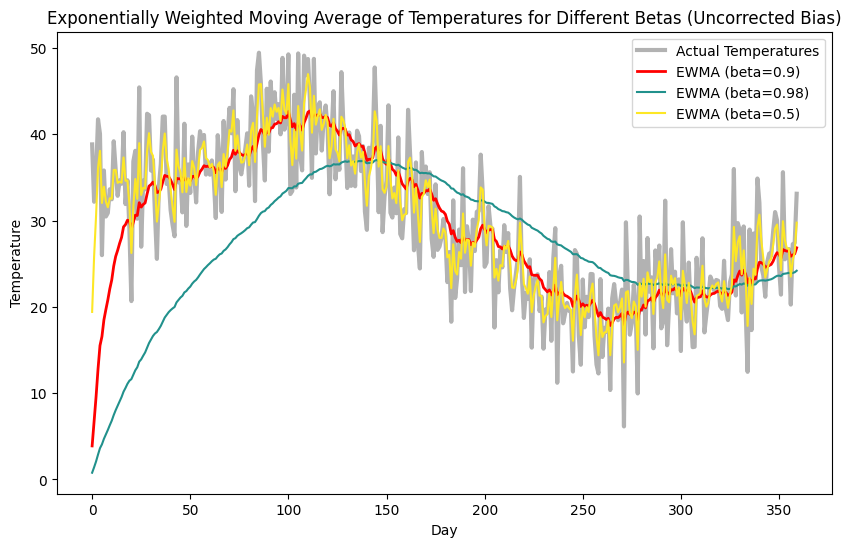

In [3]:
plot_ewma(temperatures, betas, correct_bias=False)

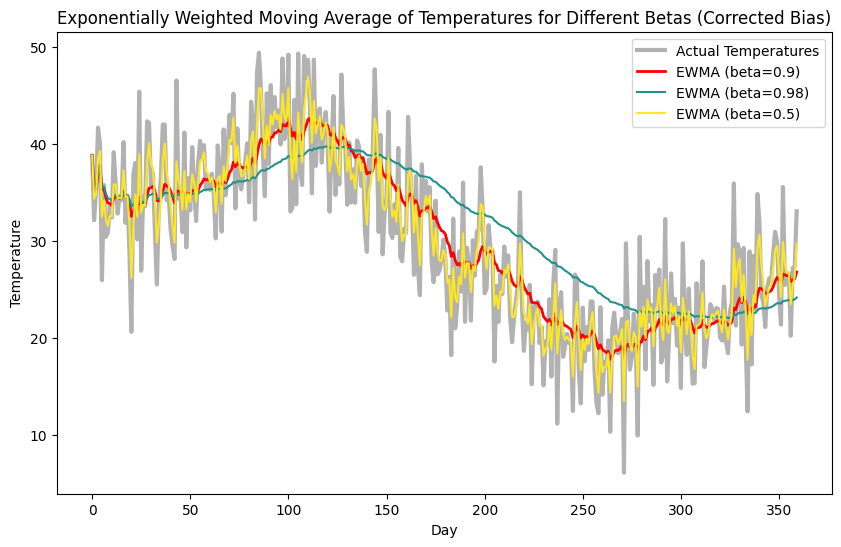

In [4]:
plot_ewma(temperatures, betas, correct_bias=True)

# 7. Learning Rate Update Methods

### 7.1 Gradient Descent Update
- Intuition: Imagine walking down a hill, taking small steps proportional to the steepness of the slope. If the slope is flat, steps are tiny; if the slope is steep, steps are large.
- Challenge: Can be very slow, especially if the loss function has plateaus or shallow regions.
- Formula: $w = w - \alpha \frac{\partial L}{\partial w}$, where $\alpha$ is the learning rate.

### 7.2 Momentum Update
- Intuition: Picture a ball rolling down a hill. The ball builds up momentum as it goes, helping it get over small bumps and converge faster.
- Formula: $v = \mu v - \alpha \frac{\partial L}{\partial w}$, where $\mu$ is the momentum parameter and $v$ is the velocity vector. Then, $w = w + v$.

### 7.3 Nesterov Momentum Update
- Intuition: Before updating the position (like in Momentum), take a look ahead to see where our current momentum is taking us and then make a correction.
- Formula: $v = \mu v - \alpha \frac{\partial L}{\partial w}$, where $\mu$ is the momentum parameter and $v$ is the velocity vector. Then, $w = w + \mu v - \alpha \frac{\partial L}{\partial w}$.

### 7.4 AdaGrad Update
- Intuition: Adjusts the learning rate based on the history of the gradient. If we've seen a large gradient in the past, we'll be cautious and use a smaller learning rate. If we've seen small gradients in the past, we'll take bigger steps.
- Formula: $w = w - \frac{\alpha}{\sqrt{G + \epsilon}} \frac{\partial L}{\partial w}$, where $G$ is the sum of the squares of the past gradients and $\epsilon$ is a small number to avoid division by zero.

### 7.5 RMSProp Update
- Intuition: Similar to AdaGrad, but instead of accumulating all past squared gradients, it maintains a moving average. This helps in not slowing down the learning too much.
- Formula: $G = \gamma G + (1 - \gamma) \frac{\partial L}{\partial w} \odot \frac{\partial L}{\partial w}$, where $G$ is the moving average of the squared gradients and $\gamma$ is the decay rate. Then, $w = w - \frac{\alpha}{\sqrt{G + \epsilon}} \frac{\partial L}{\partial w}$.

### 7.6 Adam Update
- Intuition: Combines the ideas of Momentum and RMSProp. It calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.
- Formula: $m = \beta_1 m + (1 - \beta_1) \frac{\partial L}{\partial w}$, where $m$ is the moving average of the gradient. Then, $v = \beta_2 v + (1 - \beta_2) \frac{\partial L}{\partial w} \odot \frac{\partial L}{\partial w}$, where $v$ is the moving average of the squared gradient. Then, $w = w - \frac{\alpha}{\sqrt{v + \epsilon}} m$.

<hr>

# 8. Second Order Optimization Methods
Given the loss function $L(w)$, we want to find the parameters $w$ that minimize $L(w)$. We can do this by taking the derivative of $L(w)$ with respect to $w$ and setting it to zero. This gives us the optimal parameters $w^*$.

### 8.1 Newton-Hessian Parameter Update
- Intuition: The Newton-Hessian method is a second-order optimization method that uses the second derivative of the loss function to update the parameters. It is very fast, but requires calculating the second derivative, which can be expensive.
- Formula: $w = w - H^{-1} \nabla_w L(w)$, where $H$ is the Hessian matrix of second derivatives.
- Advantages:
    - Fast convergence compared to first-order methods.
    - Does not rely on hyperparameters like learning rate.
- Challenges:
    - Impractical for deep neural networks due to computational challenges. For instance, if there are one million parameters, the Hessian matrix becomes $10^6 \times 10^6$, making its inversion computationally expensive.

### 8.2 Quasi-Newton Methods
- Intuition: Quasi-Newton methods approximate the Hessian matrix, making it easier to compute.

#### 8.2.1 BFGS (Broyden-Fletcher-Goldfarb-Shanno) Update
- Intuition: Being the most popular, this method approximates the inverse Hessian using rank-1 updates over time, making it computationally more efficient than directly inverting the Hessian.
- Formula: $w = w - H^{-1} \nabla_w L(w)$, where $H$ is the Hessian matrix of second derivatives.

#### 8.2.2 L-BFGS (Limited Memory BFGS) Update
- Intuition: This method is a memory-efficient version of BFGS, which approximates the inverse Hessian using rank-1 updates over time, making it computationally more efficient than directly inverting the Hessian.
- Advantages:
    - Avoids forming or storing the full inverse Hessian, hence the name "limited memory".
    - Highly effective for full-batch, deterministic settings.
- Challenges:
    - Not suitable for mini-batch settings, where the loss function is stochastic.
    - Not suitable for non-deterministic settings, where the loss function is non-deterministic.
    
<hr>